# Two Independent Samples Unequal Variance (Welch’s Test)
Reproduce the example from Duke, see link below.

References:
- [Two Independent Samples Unequal Variance (Welch’s Test)](https://sites.nicholas.duke.edu/statsreview/means/welch/) (Nicholas School of the Environment, Duke University)

# Imports

In [1]:
import numpy as np
import scipy.stats
# from statsmodels.stats import weightstats

import matplotlib.pyplot as plt
%matplotlib inline

From the link (with some rearrangments, emphasis added).

> To conduct a two independent sample comparison of means test, you follow very similar steps as described in the one sample test with some modifications.  For this problem, we want to compare the average weights of blue crabs in two river basins: (1) Tar-Pamlico and (2) Neuse River.  Based on the health of the two rivers, we believe that the crabs in the Neuse will be larger, on average, and would like to test for this effect.  

> **Decide type of comparison of means test.**  
This problems illustrates a two independent sample test.  We will use the Welch’s t-test which does NOT require the assumption of equal variance between populations.
 
> **Decide whether a one- or two-sided test.**  
This is a one-sided test in which we hypothesize that the crabs in the Neuse will weigh more than the crabs in the Tar Pamlico basin.
 
> **Establish null and alternative hypotheses.**    
- Null hypothesis (H0):  $\mu_\text{Neuse} \le \mu_\text{Tar-Pamlico}$.  
- Alternative hypothesis (Ha):  $\mu_\text{Neuse} > \mu_\text{Tar-Pamlico}$.
 

> Because we want to test if the Neuse crabs are larger than the crabs in the Tar Pamlico basin, we set the alternative hypothesis to state that the mean weight of crabs in the Neuse minus the mean weight of TP crabs is greater than zero.  The null hypothesis should cover all other possible outcomes.  
> **Please note that the population parameters are used in the hypotheses and NOT the sample statistics.**

**Note.**  The last remark is an import one.  For concreteness, further down it explains that we will take the two means (under the null hypothesis) to be equal, so that their difference is zero.  
 

> **Decide whether a z-statistic or t-statistic is appropriate.**  
We do not know the true standard deviations of the weights of the crabs in the two basins.  Therefore it is most appropriate to use a t-test in this example.  If the sample size is large enough, the t-distribution will approximate the normal distribution.

Not explicitly stated that these are Welch's t-statistics.

> We randomly sample 100 blue crabs in each basin.  The mean weight of the Tar Pamlico crabs is 700 grams with a standard deviation of 300g (stp).  The mean weight of the Neuse crabs is 800 grams with a standard deviation of 400 grams (sn).  A side-by-side boxplot of the two samples is shown below.

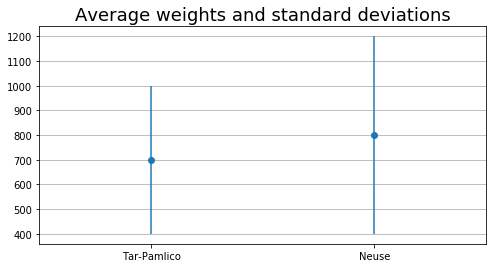

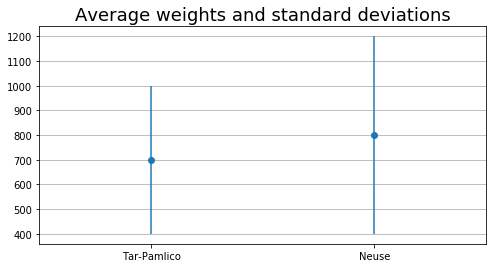

In [2]:
# Tar-Pamlico crabs
label0 = 'Tar-Pamlico'
idx0 = 0
mu0 = 700
sigma0 = 300
n0 = 100

# Neuse crab
label1 = 'Neuse'
idx1 = 1
mu1 = 800
sigma1 = 400
n1 = n0

# Aggregates
labels = [label0, label1]
idxs = [idx0, idx1]
mus = np.array([mu0, mu1])
sigmas = np.array([sigma0, sigma1])
ns = np.array([n0, n1])

# Visualization
fig, ax = plt.subplots(figsize=(8, 4))

ax.errorbar(idxs, mus, sigmas, fmt='o')

ax.set_xlim(idxs[0] - .5, idxs[-1] + .5)
ax.set_xticks(idxs)
ax.set_xticklabels(labels)
ax.set_title("Average weights and standard deviations", fontsize=18)

ax.grid(axis='y');

> **Calculate the Welch’s t-statistic.**  
As you may recall from the one sample module, the general form of a test statistic is:
$$\text{test statistic} = \frac{estimate - value\,we\,hypothesize}{standard\,error}$$
In the case of two independent samples, our estimate is the difference between the two sample means.  The hypothesized value is the difference we hypothesize between the two true population means—this is often zero (to test whether there IS a difference or not between the means of the two populations).  

Here, "N" is for "Neuse", "T" for "Tar-Pamlico":
$$t_\text{stat} = \frac{(\overline x_N - \overline x_T) - (\mu_N - \mu_T)}{\sqrt{\frac{s_N^2}{n_N} + \frac{s_T^2}{n_T}}}$$

Calculate the standard error:

In [3]:
sem = np.sqrt(np.sum(sigmas**2/ns))

> Statistical packages estimate the degrees of freedom for the Welch’s t-test, or more simplistically (and less accurately) we can estimate the degrees of freedom by subtracting one from the smaller of the two sample sizes (in this case 99).  So in this problem, the t-statistic equals (800 – 700)/50 = 100/50 = 2, with an estimated degrees of freedom of 99.


Calculate t-statistic and set degrees of freedom (**note** this is not an accurate value for the degrees of freedom, but it will do):

In [4]:
mu_diff = mu1 - mu0
t_stat = mu_diff/sem

df = min(ns) - 1
print(f"t-statistic: {t_stat:.3f}")

t-statistic: 2.000
t-statistic: 2.000


> **Determine p-value from the test statistic using the appropriate z or t distribution.**  
A t-stat of 2, with 99 degrees of freedom, corresponds with a small p-value–less than 0.025 (p(t>2)<0.025).  We can reject the null hypothesis at an alpha of 0.05.

In [5]:
p_value = scipy.stats.t.sf(t_stat, df=df)
print(f"p-value for the test: {p_value:.4f}")

p-value for the test: 0.0241
p-value for the test: 0.0241


> **Interpret the p-value in terms of the hypotheses established prior to the test.**   
These results suggest that the mean weight of blue crabs in the Neuse are greater than the mean weight of blue crabs in the Tar Pamlico.